In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from xgboost import XGBRegressor
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
import shap
shap.initjs()

In [2]:
df = pd.read_csv('GenericWellDataPrepped.csv')

In [3]:
dff = pd.read_csv('GenericWellDataPrepped.csv')

In [4]:
df.head(10)

,Well Index,TrueVerticalDepth_FT,MeasuredDepth_FT,UpperPerforation_FT,LowerPerforation_FT,PerforationInterval_FT,LateralLength_FT,ProppantLoad_LBSPerGAL,ProppantIntensity_LBSPerFT,TotalProppant_LBS,TotalWaterPumped_GAL,WaterIntensity_GALPerFT,TotalFluidPumped_BBL,FluidIntensity_BBLPerFT,AcidVolume_BBL,DrillingDuration_DAYS,OilTest_Method_FLOWING,OilTest_Method_GAS LIFT,OilTest_Method_PUMPING,FractureStages,AvgStageSpacing_FT,InitialProductionDate,DrillingStartDate,InitialProductionYear,DrillingCompletionDate,YearOfDrilling,InitialProductionMonth,ProductionMonthsCount,First36MonthWater_BBL,First3MonthGas_MCF,First3MonthGas_MCFPer1000FT,First3MonthProd_MCFE,First3MonthProd_MCFEPer1000FT,First3MonthOil_BBL,First3MonthOil_BBLPer1000FT,First3MonthWater_BBL,First6MonthProd_BOE,First6MonthProd_BOEPer1000FT,First6MonthGas_MCF,First6MonthGas_MCFPer1000FT,First6MonthProd_MCFE,First6MonthProd_MCFEPer1000FT,First6MonthOil_BBL,First6MonthOil_BBLPer1000FT,First6MonthWater_BBL,First9MonthProd_BOE,First9MonthProd_BOEPer1000FT,First9MonthGas_MCF,First9MonthGas_MCFPer1000FT,First9MonthProd_MCFE,First9MonthProd_MCFEPer1000FT,First9MonthOil_BBL,First9MonthOil_BBLPer1000FT,First9MonthWater_BBL,First12MonthProd_BOE,First12MonthProd_BOEPer1000FT,First12MonthGas_MCF,First12MonthGas_MCFPer1000FT,First12MonthProd_MCFE,First12MonthProd_MCFEPer1000FT,First12MonthOil_BBL,First12MonthOil_BBLPer1000FT,First12MonthWater_BBL,First36MonthProd_BOE,First36MonthProd_BOEPer1000FT,First36MonthGas_MCFPer1000FT,First36MonthProd_MCFE,First36MonthProd_MCFEPer1000FT,First36MonthOil_BBLPer1000FT,First36MonthWaterProductionBBLPer1000Ft,PeakProd_BOE,PeakProd_BOEPer1000FT,PeakGas_MCF,PeakGas_MCFPer1000FT,PeakProd_MCFE,PeakProd_MCFEPer1000FT,PeakOil_BBL,PeakOil_BBLPer1000FT,PeakWater_BBL,CumProd_BOE,CumProd_BOEPer1000FT,CumGas_MCF,CumGas_MCFPer1000FT,CumProd_MCFE,CumProd_MCFEPer1000FT,CumOil_BBL,CumOil_BBLPer1000FT,CumWater_BBL,First3MonthProd_BOEPer1000FT
0,1,11890.0,15995.0,11878.0,15811.0,3933.0,3718.0,4.445714,1802.428571,1.429378e+07,404320.0,103.000000,9627.000000,2.000000,1216.428571,13.285714,0.0,0.0,1.0,NaN,NaN,2011-02-01,2006-03-04,2011,2006-05-27,2011,NaN,154,0.0,5275,1341.0,5768,1466.0,82,21.0,0,1734,441.0,9419,2395.0,10407,2646.0,165,42.0,0,2881.0,733.0,15792.0,4015.0,17286.0,4395.0,249.0,63.0,0.0,4209.0,1070.0,23103.0,5874.0,25253.0,6421.0,358.0,91.0,0.0,17737.0,4510.0,24917.0,106419.0,27058.0,357.0,0.0,2202,560.0,12095,3075.0,13214,3360.0,417,106.0,175,153536,39038.0,856573,217791.0,921216,234227.0,10774,2739.0,2182,244.0
1,2,9141.0,13493.0,9470.0,13400.0,3930.0,4076.0,0.770000,672.000000,2.641750e+06,3412481.0,868.000000,81250.000000,21.000000,555.142857,7.428571,0.0,0.0,1.0,NaN,NaN,2011-02-01,2010-11-19,2011,2011-02-05,2011,NaN,153,112436.0,31368,7982.0,115404,29365.0,14006,3564.0,28434,37128,9447.0,72514,18451.0,222766,56683.0,25042,6372.0,50273,46989.0,11956.0,101067.0,25717.0,281931.0,71738.0,30144.0,7670.0,60050.0,55647.0,14160.0,131306.0,33411.0,333884.0,84958.0,33763.0,8591.0,66797.0,102907.0,26185.0,63949.0,617442.0,157110.0,15527.0,28610.0,9659,2458.0,15399,3918.0,57951,14746.0,7092,1805.0,14434,170139,43292.0,491924,125171.0,1020832,259754.0,88151,22430.0,141001,4894.0
2,3,9688.0,13824.0,10082.0,13739.0,3657.0,3943.0,0.990000,1094.000000,4.000020e+06,4051150.0,1108.000000,96456.000000,26.000000,708.857143,6.142857,0.0,0.0,1.0,NaN,NaN,2011-03-01,2010-09-13,2011,2011-03-02,2011,NaN,153,35900.0,1641,449.0,19049,5209.0,2901,793.0,3372,6744,1844.0,3517,962.0,40461,11064.0,6157,1684.0,7126,9464.0,2588.0,5612.0,1535.0,56786.0,15528.0,8529.0,2332.0,9836.0,12068.0,3300.0,6915.0,1891.0,72409.0,19800.0,10916.0,2985.0,12541.0,33880.0,9264.0,2560.0,203278.0,55586.0,8838.0,9817.0,1688,462.0,1576,431.0,10126,2769.0,1595,436.0,7485,99049,27085.0,102078,27913.0,594295,162509.0,82036,22433.0,175835,868.0
3,4,9187.0,13542.0,9451.0,13436.0,3985.0,4145.0,0.470000,560.000000,2.233000e+06,4768999.0,1197.000000,113548.000000,28.000000,675.428571,5.142857,0.0,1.0,0.0,NaN,Na

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16707 entries, 0 to 16706
Data columns (total 89 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Well Index                               16707 non-null  int64  
 1   TrueVerticalDepth_FT                     16707 non-null  float64
 2   MeasuredDepth_FT                         16707 non-null  float64
 3   UpperPerforation_FT                      16707 non-null  float64
 4   LowerPerforation_FT                      16707 non-null  float64
 5   PerforationInterval_FT                   16707 non-null  float64
 6   LateralLength_FT                         16707 non-null  float64
 7   ProppantLoad_LBSPerGAL                   16707 non-null  float64
 8   ProppantIntensity_LBSPerFT               16707 non-null  float64
 9   TotalProppant_LBS                        16707 non-null  float64
 10  TotalWaterPumped_GAL                     16707

In [6]:
#df = df.iloc[:, :44]  # Select columns up to index 42 (excluding 43)  
#df.drop(df.columns[26], axis=1, inplace=True)
#print(df.info())

In [7]:
df_cleaned = df.copy()

In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16707 entries, 0 to 16706
Data columns (total 89 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Well Index                               16707 non-null  int64  
 1   TrueVerticalDepth_FT                     16707 non-null  float64
 2   MeasuredDepth_FT                         16707 non-null  float64
 3   UpperPerforation_FT                      16707 non-null  float64
 4   LowerPerforation_FT                      16707 non-null  float64
 5   PerforationInterval_FT                   16707 non-null  float64
 6   LateralLength_FT                         16707 non-null  float64
 7   ProppantLoad_LBSPerGAL                   16707 non-null  float64
 8   ProppantIntensity_LBSPerFT               16707 non-null  float64
 9   TotalProppant_LBS                        16707 non-null  float64
 10  TotalWaterPumped_GAL                     16707

In [9]:
y_w_3 = df_cleaned['First3MonthWater_BBL']
y_g_3 = df_cleaned['First3MonthGas_MCF']
y_o_3 = df_cleaned['First3MonthOil_BBL']
y_w_6 = df_cleaned['First6MonthWater_BBL']
y_g_6 = df_cleaned['First6MonthGas_MCF']
y_o_6 = df_cleaned['First6MonthOil_BBL']

In [29]:
X=df_cleaned
X = df_cleaned.iloc[:, :28]
X = X.drop("Well Index", axis=1)
X = X.drop('InitialProductionDate',axis=1)
X = X.drop('InitialProductionMonth',axis=1)
X = X.drop('DrillingStartDate',axis=1)
X = X.drop('DrillingCompletionDate',axis=1)
for col in X.columns:
    if pd.api.types.is_object_dtype(X[col]):
        X[col] = X[col].str.replace(',', '')
        X[col] = X[col].str.replace(' ', '')
        X[col] = X[col].astype(float)
X.head()

,TrueVerticalDepth_FT,MeasuredDepth_FT,UpperPerforation_FT,LowerPerforation_FT,PerforationInterval_FT,LateralLength_FT,ProppantLoad_LBSPerGAL,ProppantIntensity_LBSPerFT,TotalProppant_LBS,TotalWaterPumped_GAL,WaterIntensity_GALPerFT,TotalFluidPumped_BBL,FluidIntensity_BBLPerFT,AcidVolume_BBL,DrillingDuration_DAYS,OilTest_Method_FLOWING,OilTest_Method_GAS LIFT,OilTest_Method_PUMPING,FractureStages,AvgStageSpacing_FT,InitialProductionYear,YearOfDrilling,ProductionMonthsCount
0,11890.0,15995.0,11878.0,15811.0,3933.0,3718.0,4.445714,1802.428571,1.429378e+07,404320.0,103.000000,9627.000000,2.000000,1216.428571,13.285714,0.0,0.0,1.0,NaN,NaN,2011,2011,154
1,9141.0,13493.0,9470.0,13400.0,3930.0,4076.0,0.770000,672.000000,2.641750e+06,3412481.0,868.000000,81250.000000,21.000000,555.142857,7.428571,0.0,0.0,1.0,NaN,NaN,2011,2011,153
2,9688.0,13824.0,10082.0,13739.0,3657.0,3943.0,0.990000,1094.000000,4.000020e+06,4051150.0,1108.000000,96456.000000,26.000000,708.857143,6.142857,0.0,0.0,1.0,NaN,NaN,2011,2011,153
3,9187.0,13542.0,9451.0,13436.0,3985.0,4145.0,0.470000,560.000000,2.233000e+06,4768999.0,1197.000000,113548.000000,28.000000,675.428571,5.142857,0.0,1.0,0.0,NaN,NaN,2011,2011,152
4,7935.0,12859.0,8478.0,12690.0,4212.0,4564.0,0.841429,1195.000000,5.033010e+06,6029816.0,1420.714286,145108.285714,34.142857,716.857143,7.714286,0.0,0.0,1.0,15.0,304.0,2011,2011,152


In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16707 entries, 0 to 16706
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TrueVerticalDepth_FT        16707 non-null  float64
 1   MeasuredDepth_FT            16707 non-null  float64
 2   UpperPerforation_FT         16707 non-null  float64
 3   LowerPerforation_FT         16707 non-null  float64
 4   PerforationInterval_FT      16707 non-null  float64
 5   LateralLength_FT            16707 non-null  float64
 6   ProppantLoad_LBSPerGAL      16707 non-null  float64
 7   ProppantIntensity_LBSPerFT  16707 non-null  float64
 8   TotalProppant_LBS           16707 non-null  float64
 9   TotalWaterPumped_GAL        16707 non-null  float64
 10  WaterIntensity_GALPerFT     16707 non-null  float64
 11  TotalFluidPumped_BBL        16707 non-null  float64
 12  FluidIntensity_BBLPerFT     16707 non-null  float64
 13  AcidVolume_BBL              167

In [31]:
X_train, X_test, y_train_w_3, y_test_w_3 = train_test_split(X, y_w_3, test_size=0.2, random_state=99)
X_train, X_test, y_train_g_3, y_test_g_3 = train_test_split(X, y_g_3, test_size=0.2, random_state=99)
X_train, X_test, y_train_o_3, y_test_o_3 = train_test_split(X, y_o_3, test_size=0.2, random_state=99)

X_train, X_test, y_train_w_6, y_test_w_6 = train_test_split(X, y_w_6, test_size=0.2, random_state=99)
X_train, X_test, y_train_g_6, y_test_g_6 = train_test_split(X, y_g_6, test_size=0.2, random_state=99)
X_train, X_test, y_train_o_6, y_test_o_6 = train_test_split(X, y_o_6, test_size=0.2, random_state=99)

In [32]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.75, 0.1, 0.25],
    'n_estimators': [300, 400, 500, 750],
    'max_depth': [5, 7, 9, 11],
    'alpha': [0.1, 0.5, 0.75, 0.999]
}
gb_mod_t = XGBRegressor(random_state=99)
grid_search = GridSearchCV(estimator=gb_mod_t, param_grid=param_grid, cv = 2, scoring='r2')
# Fit the grid search to your data

In [33]:
gb_mod_7 = XGBRegressor(learning_rate=0.075, n_estimators= 400, max_depth = 7, random_state=99, alpha = 0.5)
gb_mod_7.fit(X_train, y_train_o_3)
print("XG Boost (default parameters) Train R2: ", gb_mod_7.score(X_train, y_train_o_3))
print("XG Boost (default parameters) Test R2: ", gb_mod_7.score(X_test, y_test_o_3))

XG Boost (default parameters) Train R2:  0.8626158648089535
XG Boost (default parameters) Test R2:  0.3700158016851466


In [34]:
explainer = shap.Explainer(gb_mod_7.predict, X_test)
shap_values = explainer(X_test)

PermutationExplainer explainer: 3343it [05:01, 10.72it/s]                                                              


In [16]:
# Takes a lot longer, gets you less data to reference
#shap_values_values_only = explainer.shap_values(X)

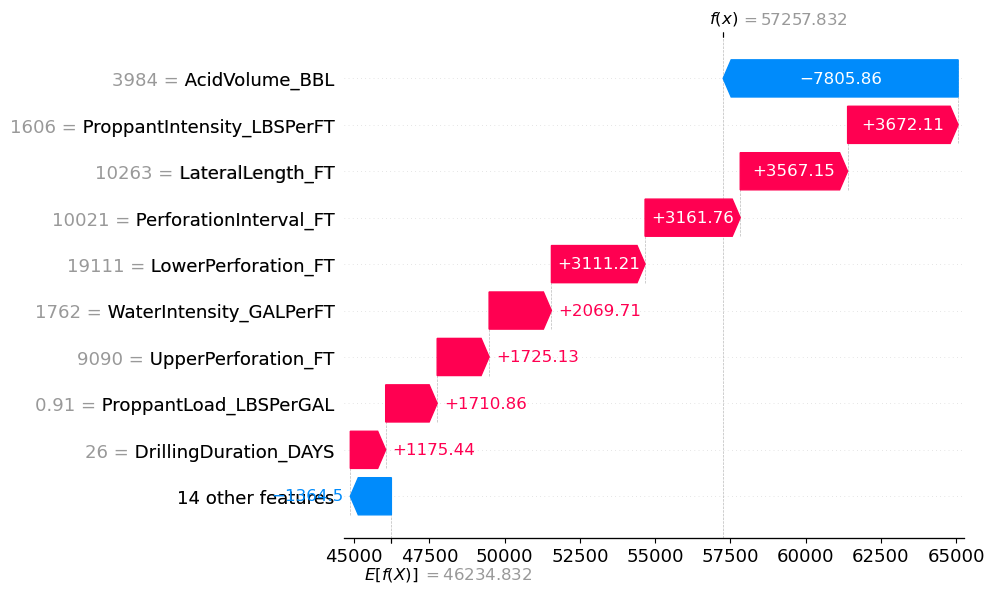

In [35]:
shap.plots.waterfall(shap_values[0])

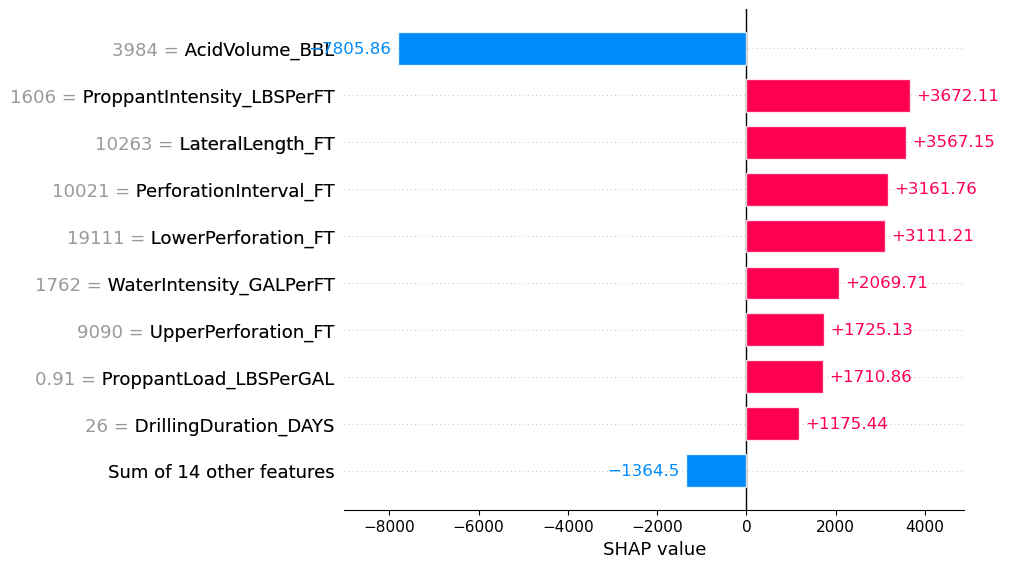

In [36]:
shap.plots.bar(shap_values[0])

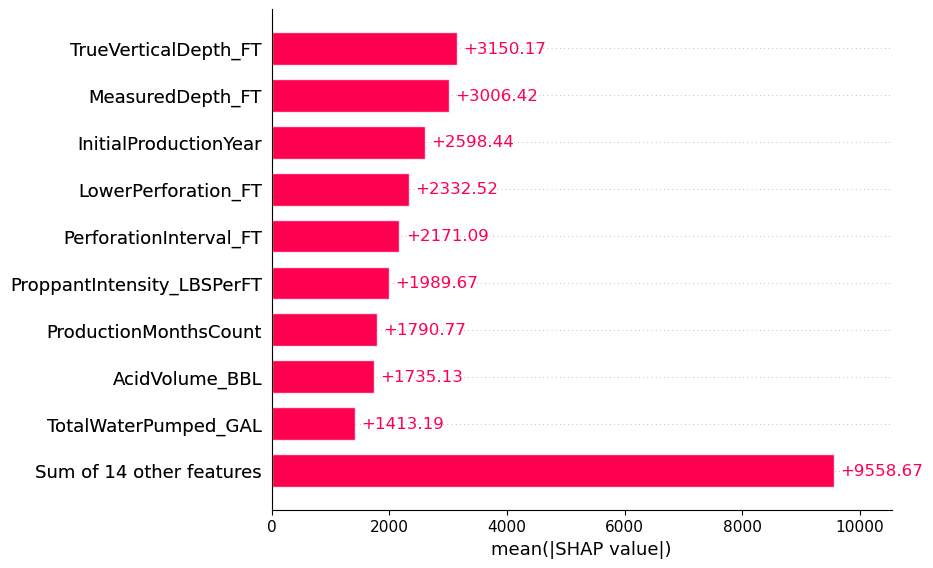

In [37]:
shap.plots.bar(shap_values)

In [38]:
shap.plots.force(shap_values[0])

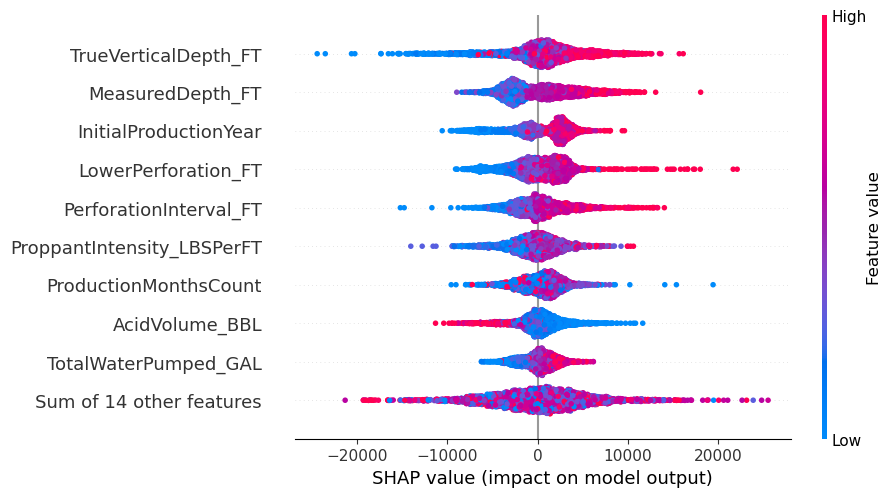

In [39]:
shap.plots.beeswarm(shap_values)

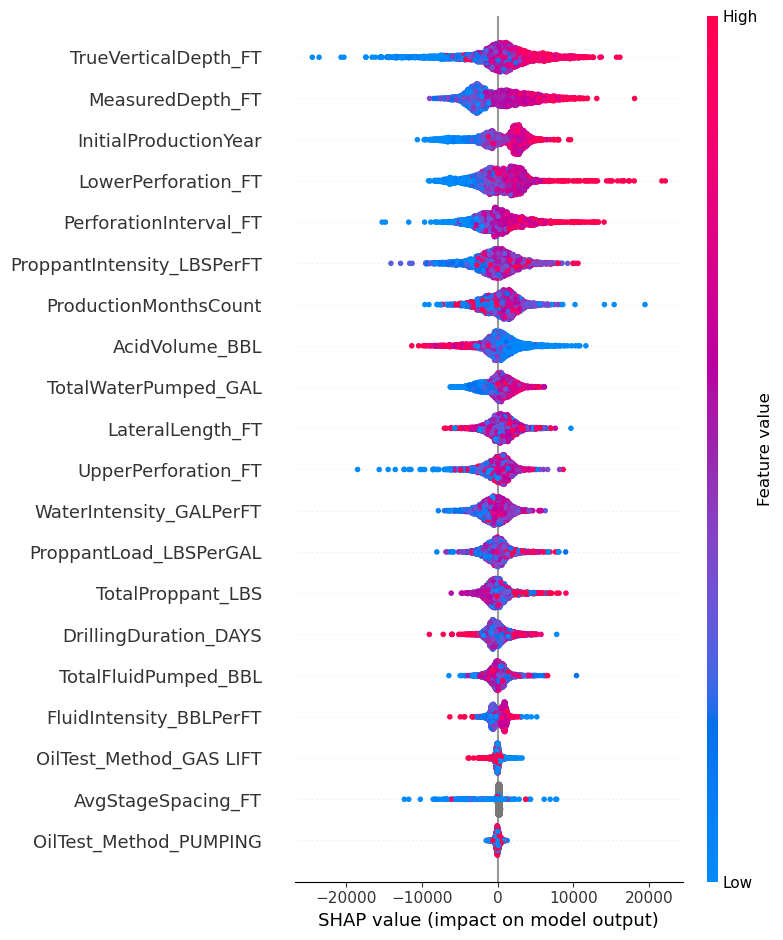

In [40]:
shap.summary_plot(shap_values)

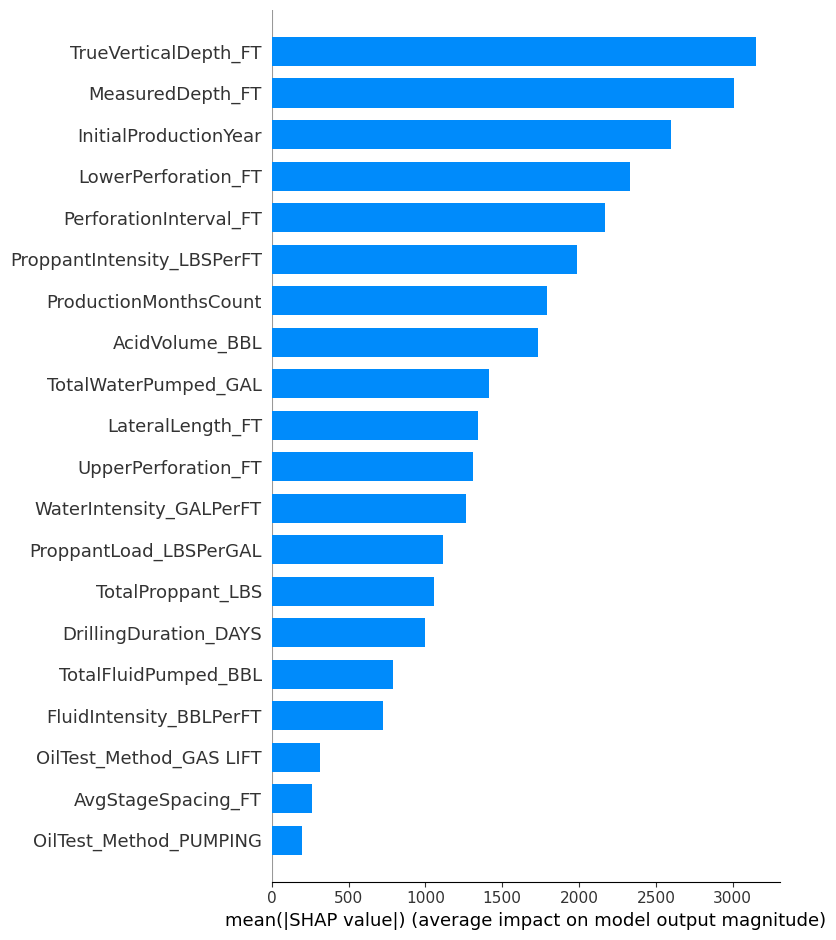

In [41]:
shap.summary_plot(shap_values, plot_type='bar')

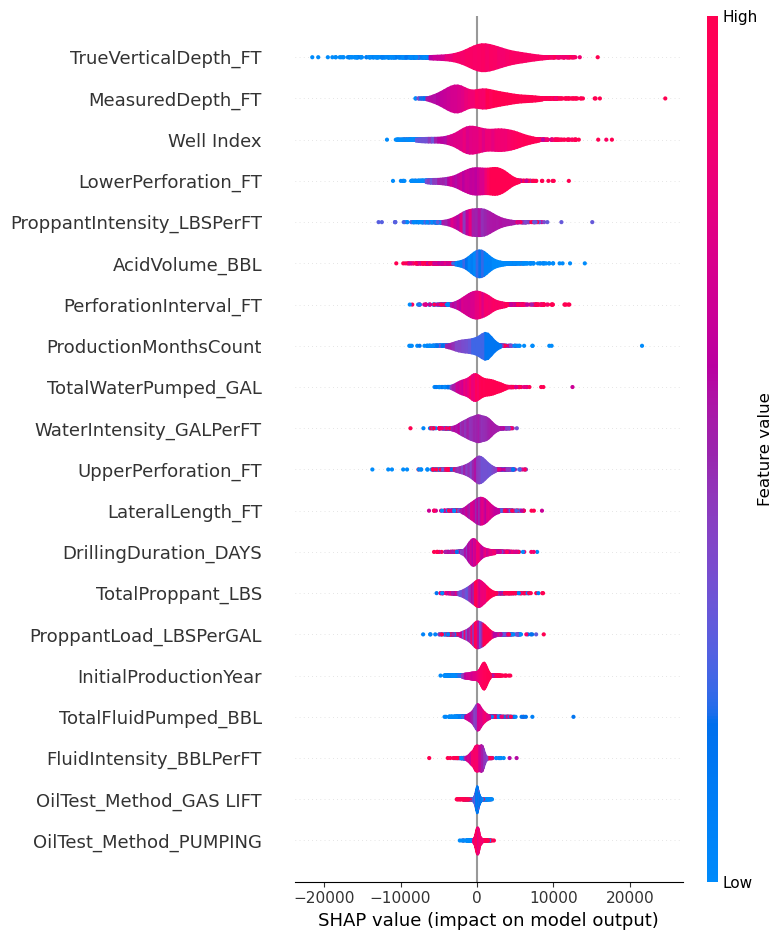

In [24]:
shap.summary_plot(shap_values, plot_type='violin')